In [22]:
import numpy as np
import matplotlib.pyplot as plt

## Функции

In [78]:
def FuncOrbite(t, y, mu):
    r = np.copy(y[:3])
    v = np.copy(y[3:])
    return np.concatenate((v, -mu * r / np.linalg.norm(r)**3), axis=0)

def Euler(h, y, N, func):
    sol = np.zeros((N, y.size))
    sol[0] = y
    T = np.linspace(0, N*h, N)
    print(T)
    for t in range(1, N):
        k1 = func(T[t-1], y, mu)
        y = y + h * k1
        sol[t] = y
    return sol

def RK4(h, y, N, func):
    sol = np.zeros((N, y.size))
    sol[0] = y
    T = np.linspace(0, N*h, N)
    for t in range(1, N):
        k1 = func(t, y, mu)
        k2 = func(t + h/2, y + h * k1 / 2, mu)
        k3 = func(t + h/2, y + h * k2 / 2, mu)
        k4 = func(t + h, y + h * k3, mu)
        y = y + h / 6 * (k1 + 2*k2 + 2*k3 + k4)
        sol[t] = y
    return sol

## Задача

In [107]:
mu = 1
y0 = np.array([70, 0, 0, 0, 0.1, 0])
N = 300
h = 10
solution = RK4(h, y0, N, FuncOrbite)

## Представление результатов

In [108]:
#for i in range(y0.size):
    #print(solution[:,i])

<function matplotlib.pyplot.show(close=None, block=None)>

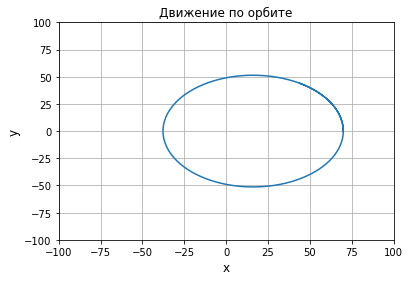

In [109]:
theta = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots()
#X, Y = coords(rad(theta, i), theta)
ax.plot(solution[:, 0], solution[:, 1])
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_title('Движение по орбите', size=12)
ax.grid()
ax.set_xlabel('x', size=12)
ax.set_ylabel('y', size=12)
plt.show

In [13]:
cra = np.array([7e6, 0, 0, 0, 8e6, 0])
k1 = FuncOrbite(0, cra, mu)
print(type(k1))


<class 'numpy.ndarray'>
